### Artificial neural networks
* mimics the functionality of human neural system
* works based on interconnected nodes/ artificial neurons
* nodes are organised in 3 layers - input layer, hidden layer and output layer
* data processing is done in hidden layers using activation function
* activation function helps in nonlinear outcomes
* weights and bias associated with each node except at the input layer
* weights and bias altered during learning phase based on error estimation

#### Importing required libraries

In [1]:
# Importing necessary libraries to build the machine learning model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings("ignore")

#### Read data
<pre>

In this demo, we are going to work on mnist dataset, which contains the 28*28 pixels' details of handwritten digits. 
Every row in the dataset represents a 28*28 image, and has the label of the image (0 to 9)</pre>

In [2]:
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels 
mnist_train = pd.read_csv("datasets/mnist/train.csv")
mnist_test = pd.read_csv("datasets/mnist/test.csv")

Text(0.5, 1.0, 'First digit in test data ')

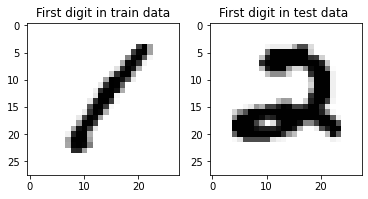

In [3]:
# Let's visualize the image represented by the first rows of the train data and the test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")

### Feature Engineering

In [4]:
"""Let us now assign the label column value to a new variable Y_train 
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]

### Building an Artificial Neural Network

In [5]:
from sklearn.neural_network import MLPClassifier
# Let us now create a machine learning model to learn from train data
# We shall use a simple 1 layer 50 node neural network to learn this. 
nn_model = MLPClassifier(hidden_layer_sizes=(50))
# The fit method initiates the learning process. When its execution completes, the model is learnt
nn_model.fit(X_train,mnist_train.iloc[:,0])

MLPClassifier(hidden_layer_sizes=50)

In [6]:
# Now that we have a model, lets get it to predict the value of the first digit in the test data
print(nn_model.predict(mnist_test.iloc[0:1,]))

[2]


### Evaluate model performance

In [7]:
print("Accuracy of model:", nn_model.score(X_train,Y_train))

Accuracy of model: 0.9878571428571429


In [8]:
predicted_digit = nn_model.predict(X_train)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_train,predicted_digit),
             index=range(0,10),columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,4125,0,0,0,0,0,0,3,2,2
1,7,4667,4,0,0,0,0,2,3,1
2,18,5,4128,1,1,0,0,21,2,1
3,32,6,26,4242,0,3,0,8,8,26
4,15,0,0,0,4027,1,0,1,5,23
5,12,2,0,7,0,3751,11,1,5,6
6,17,0,0,0,0,3,4115,0,2,0
7,1,1,2,4,0,3,0,4377,1,12
8,41,23,1,14,0,4,2,13,3928,37
9,28,1,0,9,2,1,0,5,12,4130


In [9]:
from sklearn.metrics import classification_report
# report based on tain data
print(classification_report(Y_train,predicted_digit))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4132
           1       0.99      1.00      0.99      4684
           2       0.99      0.99      0.99      4177
           3       0.99      0.97      0.98      4351
           4       1.00      0.99      0.99      4072
           5       1.00      0.99      0.99      3795
           6       1.00      0.99      1.00      4137
           7       0.99      0.99      0.99      4401
           8       0.99      0.97      0.98      4063
           9       0.97      0.99      0.98      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000

